# GBD/USD Naive Bayes Classifier for up or down prediction.

In [3]:
import yfinance as yf

ticker = "GBPUSD=X"
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")
data.head()

/Users/yuriipidlisnyi/Documents/programming/py/ai-ml-lab-1/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X
Date,,,,,
2010-01-01,1.613294,1.618202,1.613111,1.618202,0
2010-01-04,1.611370,1.623904,1.606503,1.613710,0
2010-01-05,1.599079,1.615587,1.597010,1.611863,0
2010-01-06,1.602384,1.606323,1.594388,1.599360,0
2010-01-07,1.593397,1.605858,1.590078,1.602205,0


# Calculate Daily Returns
## Compute the percentage change based on the closing prices:

In [4]:
import pandas as pd

data['daily_return'] = data['Close'].pct_change()
data['target'] = data['daily_return'].apply(lambda x: 1 if x > 0 else 0)
data.head()

Price,Close,High,Low,Open,Volume,daily_return,target
Ticker,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,,
Date,,,,,,,
2010-01-01,1.613294,1.618202,1.613111,1.618202,0,NaN,0
2010-01-04,1.611370,1.623904,1.606503,1.613710,0,-0.001192,0
2010-01-05,1.599079,1.615587,1.597010,1.611863,0,-0.007628,0
2010-01-06,1.602384,1.606323,1.594388,1.599360,0,0.002067,1
2010-01-07,1.593397,1.605858,1.590078,1.602205,0,-0.005609,0


## Create a Binary Target Variable
Use the sign of the daily return to label the target:

- Label as 1 (↑) if the return is positive.
- Label as 0 (↓) if the return is negative (or you can use strings like "up" and "down").

In [5]:
data['target'] = data['daily_return'].apply(lambda x: 1 if x > 0 else 0)
data.head()

Price,Close,High,Low,Open,Volume,daily_return,target
Ticker,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,,
Date,,,,,,,
2010-01-01,1.613294,1.618202,1.613111,1.618202,0,NaN,0
2010-01-04,1.611370,1.623904,1.606503,1.613710,0,-0.001192,0
2010-01-05,1.599079,1.615587,1.597010,1.611863,0,-0.007628,0
2010-01-06,1.602384,1.606323,1.594388,1.599360,0,0.002067,1
2010-01-07,1.593397,1.605858,1.590078,1.602205,0,-0.005609,0


## Feature Engineering (Lagged Features)
Since we are predicting the direction (up or down) for the current day, it is useful to include previous days’ returns as predictors.

In [6]:
data['lag1'] = data['daily_return'].shift(1)
data['lag2'] = data['daily_return'].shift(2)
data['lag3'] = data['daily_return'].shift(3)

Drop any rows that contain NaN values (resulting from the percentage change and lag features):

In [7]:
data.dropna(inplace=True)

To extend beyond binary,we define classes based on the magnitude of the return. We classify the nature of the move

In [8]:
DELTA_THRESHOLD = 0.005

def label_return(x, threshold=DELTA_THRESHOLD):
    if x > threshold:
        return 'strong_up'
    elif 0 < x <= threshold:
        return 'slight_up'
    elif -threshold <= x <= 0:
        return 'slight_down'
    else:
        return 'strong_down'

data['multi_target'] = data['daily_return'].apply(lambda x: label_return(x, threshold=DELTA_THRESHOLD))
data.head()


Price,Close,High,Low,Open,Volume,daily_return,target,lag1,lag2,lag3,multi_target
Ticker,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,GBPUSD=X,,,,,,
Date,,,,,,,,,,,
2010-01-07,1.593397,1.605858,1.590078,1.602205,0,-0.005609,0,0.002067,-0.007628,-0.001192,strong_down
2010-01-08,1.602410,1.610099,1.591799,1.593803,0,0.005657,1,-0.005609,0.002067,-0.007628,strong_up
2010-01-11,1.611292,1.619459,1.606787,1.608260,0,0.005543,1,0.005657,-0.005609,0.002067,strong_up
2010-01-12,1.615170,1.619617,1.606606,1.611500,0,0.002407,1,0.005543,0.005657,-0.005609,slight_up
2010-01-13,1.628611,1.630098,1.613918,1.615509,0,0.008322,1,0.002407,0.005543,0.005657,strong_up


Visualize the Distribution of Daily Returns

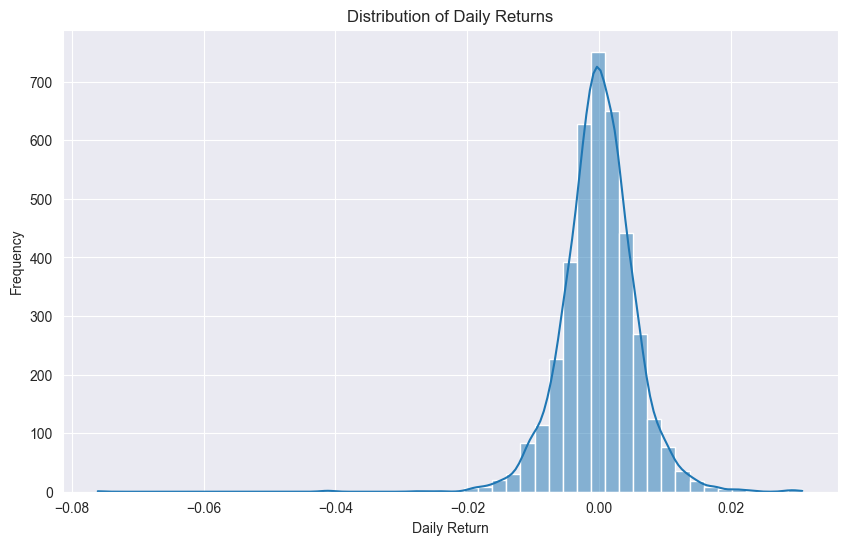

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['daily_return'], bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


Visualize the GBP/USD Chart

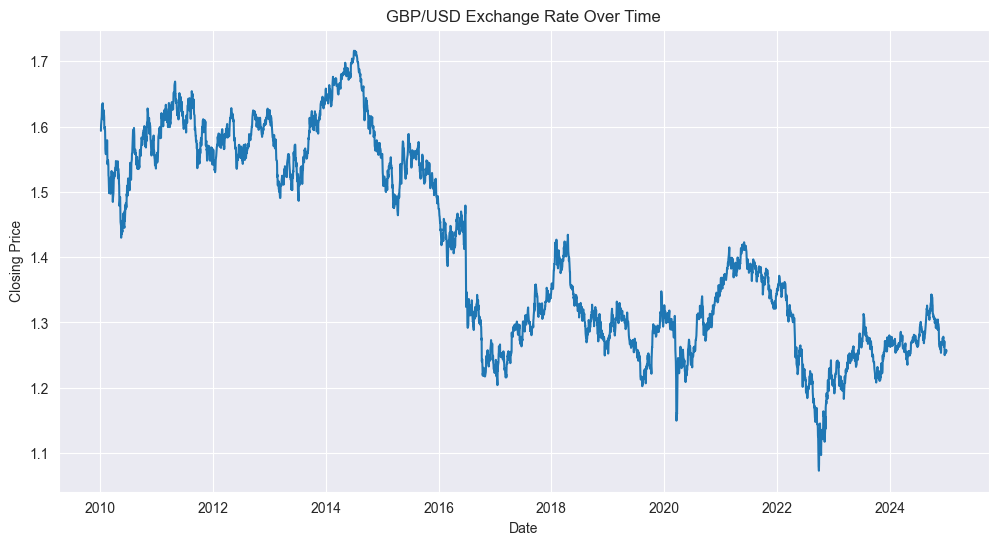

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'])
plt.title("GBP/USD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


### Visualize Class Distribution
For the binary target:

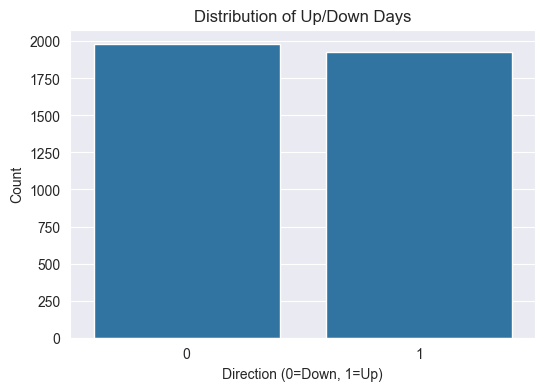

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title("Distribution of Up/Down Days")
plt.xlabel("Direction (0=Down, 1=Up)")
plt.ylabel("Count")
plt.show()


For the multi-class features:

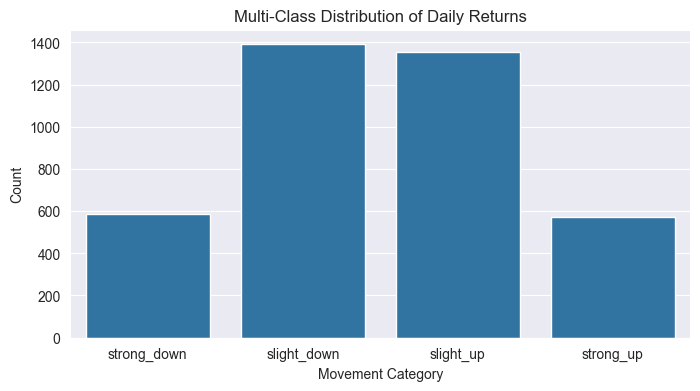

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(x='multi_target', data=data, order=['strong_down', 'slight_down', 'slight_up', 'strong_up'])
plt.title("Multi-Class Distribution of Daily Returns")
plt.xlabel("Movement Category")
plt.ylabel("Count")
plt.show()


### Train/Test Split
For binary classification, we use the lag features as predictors

In [13]:
features = ['lag1', 'lag2', 'lag3']
X = data[features]
y = data['target']


### Split the Data
Using scikit-learn’s train_test_split, split the dataset (70% training, 30% testing).We want to maintain order (i.e., avoid shuffling) since price only makes sense as a whole series.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


## Build the In-House Naive Bayesian Classifier

The Gaussian PDF (Probability Density Function) describes the likelihood of a continuous random variable taking a particular value under a normal (Gaussian) distribution. Formula for it:
   

In [15]:
import numpy as np

def gaussian_pdf(x, mean, var):
    # Avoid division by zero in case variance is very small
    eps = 1e-6
    var = var if var > eps else eps
    coefficient = 1.0 / np.sqrt(2 * np.pi * var)
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return coefficient * exponent


In [16]:
class InHouseNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {}
        self.means = {}
        self.vars = {}
        
        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / len(X)
            self.means[c] = X_c.mean()
            self.vars[c] = X_c.var()
    
    def predict_instance(self, x):
        posteriors = {}
        for c in self.classes:
            # Start with the prior probability (in log space if preferred)
            likelihood = 1
            for feature in x.index:
                mean = self.means[c][feature]
                var = self.vars[c][feature]
                likelihood *= gaussian_pdf(x[feature], mean, var)
            posteriors[c] = self.priors[c] * likelihood
        # Return the class with the maximum posterior
        return max(posteriors, key=posteriors.get)
    
    def predict(self, X):
        return X.apply(self.predict_instance, axis=1)

# Instantiate and fit the classifier
inhouse_nb = InHouseNaiveBayes()
inhouse_nb.fit(X_train, y_train)
y_pred_inhouse = inhouse_nb.predict(X_test)


Compute accuracy of in-house solution

In [17]:
from sklearn.metrics import accuracy_score
print("In-house NB Accuracy:", accuracy_score(y_test, y_pred_inhouse))


In-house NB Accuracy: 0.5127986348122867


Out-of-Box Naive Bayesian Classifier  using scikit-learn’s GaussianNB:

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)
print("Scikit-learn NB Accuracy:", accuracy_score(y_test, y_pred_sklearn))
y_prob_sklearn = model.predict_proba(X_test)[:, 1]  # Probability for class "1" (up)


Scikit-learn NB Accuracy: 0.5127986348122867


Obtain Predicted Probabilities:
This will be useful later for ROC and AUC calculations:

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob_sklearn)
roc_auc = auc(fpr, tpr)
print("AUC (scikit-learn NB):", roc_auc)


AUC (scikit-learn NB): 0.5163858264276248


Plot 

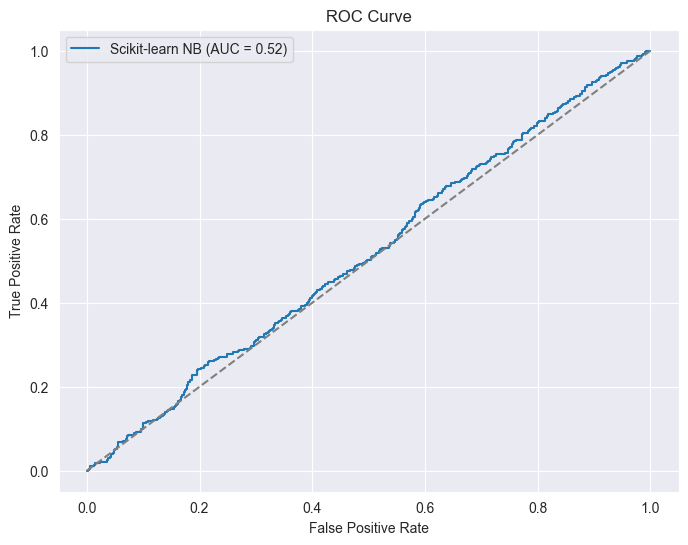

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Scikit-learn NB (AUC = {roc_auc:.2f})')
# If you computed ROC for the in-house classifier, plot that as well.
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
